<h1> Extracting Crypto Data from API

In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '17cfc2d4-c0ad-40bc-8626-b7d8b7021ec3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-10-17T22:34:09.631Z', 'error_code': 0, 'error_message': None, 'elapsed': 53, 'credit_count': 1, 'notice': None, 'total_count': 9412}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9779, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [5]:
type(data)

dict

In [6]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import pandas as pd

pd.set_option('display.max_columns', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9779,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.918208e+07,1.918208e+07,NaN,1,NaN,NaN,None,2022-10-17T22:32:00.000Z,19579.297285,2.758125e+10,54.0970,0.340054,1.453282,2.235486,-2.587465,-16.294089,-16.512454,3.755715e+11,40.0778,4.111652e+11,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
1,1027,Ethereum,ETH,ethereum,6140,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-10-17T22:32:00.000Z,1333.873203,9.483471e+09,25.5638,0.411241,2.088220,2.946426,-8.587241,-28.682108,-14.718952,1.632312e+11,17.4162,1.632312e+11,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
2,825,Tether,USDT,tether,40896,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.843256e+10,7.014613e+10,NaN,3,NaN,NaN,None,2022-10-17T22:32:00.000Z,1.000063,3.692712e+10,34.3122,-0.000523,0.000904,0.006056,-0.001249,0.007351,0.001705,6.843684e+10,7.3027,7.015051e+10,None,2022-10-17T22:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-17 22:40:26.132059
3,3408,USD Coin,USDC,usd-coin,6532,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.482565e+10,4.482565e+10,NaN,4,NaN,NaN,None,2022-10-17T22:32:00.000Z,0.999985,3.006196e+09,18.9592,-0.007212,-0.009164,0.001513,-0.004661,-0.010415,0.005242,4.482500e+10,4.7833,4.482500e+10,None,2022-10-17T22:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-17 22:40:26.132059
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-10-17T22:32:00.000Z,275.615387,5.997425e+08,5.6862,0.228980,0.921350,1.088032,-1.197714,-9.233149,1.871876,4.446703e+10,4.7446,5.512308e+10,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.988702e+10,9.998926e+10,NaN,6,NaN,NaN,None,2022-10-17T22:32:00.000Z,0.478790,1.457365e+09,40.7578,0.717908,0.552190,-5.203504,27.433787,26.397352,28.203678,2.388542e+10,2.5486,4.787902e+10,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
6,4687,Binance USD,BUSD,binance-usd,5295,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.162810e+10,2.162810e+10,NaN,7,NaN,NaN,None,2022-10-17T22:32:00.000Z,1.000023,6.440459e+09,35.1810,0.055345,0.001202,-0.050565,-0.013989,-0.031398,0.123088,2.162859e+10,2.3080,2.162859e+10,None,2022-10-17T22:32:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-17 22:40:26.132059
7,2010,Cardano,ADA,cardano,581,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.429210e+10,3.502610e+10,NaN,8,NaN,NaN,None,2022-10-17T22:32:00.000Z,0.371902,3.603689e+08,4.8416,0.386704,0.649651,-8.560327,-23.328157,-29.785577,-28.392011,1.275329e+10,1.3608,1.673557e+10,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
8,5426,Solana,SOL,solana,390,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.579837e+08,5.116169e+08,NaN,9,NaN,NaN,None,2022

<h1> Creating Automation Script to Regularly Extract Data from API into a CSV

In [8]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '17cfc2d4-c0ad-40bc-8626-b7d8b7021ec3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Haroon\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\Haroon\Documents\Python Scripts\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Haroon\Documents\Python Scripts\API.csv',mode='a',header=False)

In [41]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-10-17T22:31:21.182Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9412}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9779, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

In [9]:
df_csv = pd.read_csv(r'C:\Users\Haroon\Documents\Python Scripts\API.csv')
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9779,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.918198e+07,1.918198e+07,NaN,1,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,19519.796914,2.844578e+10,70.8743,-0.065602,1.090683,1.417984,-2.403291,-16.573433,-16.995389,3.744283e+11,40.0935,4.099157e+11,NaN,2022-10-17T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 21:42:51.370081
1,1,1027,Ethereum,ETH,ethereum,6140,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,1329.139079,9.884865e+09,41.0403,0.148063,1.417233,1.663244,-8.567107,-29.021298,-15.825536,1.626519e+11,17.4122,1.626519e+11,NaN,2022-10-17T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 21:42:51.370081
2,2,825,Tether,USDT,tether,40896,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.843256e+10,7.014613e+10,NaN,3,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,1.000080,3.799355e+10,45.7278,0.000570,-0.005562,0.009514,-0.001370,0.010603,0.004729,6.843805e+10,7.3275,7.015175e+10,NaN,2022-10-17T21:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-17 21:42:51.370081
3,3,3408,USD Coin,USDC,usd-coin,6532,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.487973e+10,4.487973e+10,NaN,4,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,1.000054,3.085722e+09,27.5032,-0.008966,-0.002588,-0.000175,-0.004316,-0.001661,-0.014973,4.488214e+10,4.8056,4.488214e+10,NaN,2022-10-17T21:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-17 21:42:51.370081
4,4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,275.044963,6.077622e+08,9.7932,-0.046921,0.667556,-0.049195,-1.177018,-9.545495,1.127983,4.437500e+10,4.7510,5.500899e+10,NaN,2022-10-17T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 21:42:51.370081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,10,3890,Polygon,MATIC,polygon,500,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'scaling'...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,11,NaN,NaN,NaN,2022-10-17T22:30:00.000Z,0.844264,3.162722e+08,83.0447,0.785610,5.258903,1.746888,2.513086,-5.666041,-9.209405,7.374068e+09,0.7869,8.442638e+09,NaN,2022-10-17T22:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:38:32.829009
371,11,6636,Polkadot,DOT,polkadot-new,419,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.127372e+09,1.242996e+09,NaN,12,9.048698e+08,5.676179e+09,NaN,2022-10-17T22:31:00.000Z,6.272923,1.743415e+08,17.6823,0.912995,1.242962,-0.507296,-10.864633,-25.519442,-20.479574,7.071921e+09,0.7547,7.797219e+09,NaN,2022-10-17T22:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:38:32.829009
372,12,4943,Dai,DAI,multi-collateral-dai,1434,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,6.459447e+09,6.459447e+09,NaN,13,NaN,NaN,NaN,2022-10-17T22:30:00.000Z,0.999846,3.122539e+08,71.9811,0.042379,-0.028499,0.028607,0.014831,-0.014507,0.022849,6.458453e+09,0.6892,6.458453e+09,NaN,2022-10-17T22:30:00.000Z,1027.0,Et

<h1> Transforming and Cleaning the Data

In [25]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9779,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19182075.00000,19182075.00000,NaN,1,NaN,NaN,None,2022-10-17T22:32:00.000Z,19579.29729,27581252187.07206,54.09700,0.34005,1.45328,2.23549,-2.58747,-16.29409,-16.51245,375571548973.34662,40.07780,411165242990.66998,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
1,1027,Ethereum,ETH,ethereum,6140,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-17T22:32:00.000Z,1333.87320,9483470641.54792,25.56380,0.41124,2.08822,2.94643,-8.58724,-28.68211,-14.71895,163231217259.34167,17.41620,163231217259.34000,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
2,825,Tether,USDT,tether,40896,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68432559804.78845,70146125804.23921,NaN,3,NaN,NaN,None,2022-10-17T22:32:00.000Z,1.00006,36927115794.87947,34.31220,-0.00052,0.00090,0.00606,-0.00125,0.00735,0.00170,68436838428.31664,7.30270,70150511565.42000,None,2022-10-17T22:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-17 22:40:26.132059
3,3408,USD Coin,USDC,usd-coin,6532,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,44825653013.25262,44825653013.25262,NaN,4,NaN,NaN,None,2022-10-17T22:32:00.000Z,0.99999,3006195855.81243,18.95920,-0.00721,-0.00916,0.00151,-0.00466,-0.01041,0.00524,44824999751.63569,4.78330,44824999751.64000,None,2022-10-17T22:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-17 22:40:26.132059
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-10-17T22:32:00.000Z,275.61539,599742472.25771,5.68620,0.22898,0.92135,1.08803,-1.19771,-9.23315,1.87188,44467031581.24737,4.74460,55123077311.25000,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49887015710.00000,99989258607.00000,NaN,6,NaN,NaN,None,2022-10-17T22:32:00.000Z,0.47879,1457364767.71547,40.75780,0.71791,0.55219,-5.20350,27.43379,26.39735,28.20368,23885416149.90001,2.54860,47879023850.11000,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40:26.132059
6,4687,Binance USD,BUSD,binance-usd,5295,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-17T22:32:00.000Z,1.00002,6440459175.03245,35.18100,0.05535,0.00120,-0.05056,-0.01399,-0.03140,0.12309,21628589782.73561,2.30800,21628589782.74000,None,2022-10-17T22:32:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-17 22:40:26.132059
7,2010,Cardano,ADA,cardano,581,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34292100452.21200,35026102954.65500,NaN,8,NaN,NaN,None,2022-10-17T22:32:00.000Z,0.37190,360368944.14415,4.84160,0.38670,0.64965,-8.56033,-23.32816,-29.78558,-28.39201,12753289018.26077,1.36080,16735574614.96000,None,2022-10-17T22:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 22:40

In [12]:
df2 = df.groupby('name', sort=False)['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.34005,1.45328,2.23549,-2.58747,-16.29409,-16.51245
Ethereum,0.41124,2.08822,2.94643,-8.58724,-28.68211,-14.71895
Tether,-0.00052,0.00090,0.00606,-0.00125,0.00735,0.00170
USD Coin,-0.00721,-0.00916,0.00151,-0.00466,-0.01041,0.00524
BNB,0.22898,0.92135,1.08803,-1.19771,-9.23315,1.87188
XRP,0.71791,0.55219,-5.20350,27.43379,26.39735,28.20368
Binance USD,0.05535,0.00120,-0.05056,-0.01399,-0.03140,0.12309
Cardano,0.38670,0.64965,-8.56033,-23.32816,-29.78558,-28.39201
Solana,0.76477,3.20920,-3.26010,-7.08547,-24.13184,-31.61804


In [13]:
df3 = df2.stack()
df3

name                                   
Bitcoin    quote.USD.percent_change_1h      0.34005
           quote.USD.percent_change_24h     1.45328
           quote.USD.percent_change_7d      2.23549
           quote.USD.percent_change_30d    -2.58747
           quote.USD.percent_change_60d   -16.29409
                                             ...   
Shiba Inu  quote.USD.percent_change_24h     0.81545
           quote.USD.percent_change_7d     -0.21261
           quote.USD.percent_change_30d   -12.65392
           quote.USD.percent_change_60d   -27.19412
           quote.USD.percent_change_90d   -15.22068
Length: 90, dtype: float64

In [14]:
type(df3)

pandas.core.series.Series

<h1> Renaming the Data

df4 = df3.to_frame(name='values')
df4

In [16]:
df4.count()

values    90
dtype: int64

<h1> Resetting the Index

index = pd.Index(range(90))

df5 = df4.reset_index()
df5

In [18]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.34005
1,Bitcoin,quote.USD.percent_change_24h,1.45328
2,Bitcoin,quote.USD.percent_change_7d,2.23549
3,Bitcoin,quote.USD.percent_change_30d,-2.58747
4,Bitcoin,quote.USD.percent_change_60d,-16.29409
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,0.81545
86,Shiba Inu,quote.USD.percent_change_7d,-0.21261
87,Shiba Inu,quote.USD.percent_change_30d,-12.65392
88,Shiba Inu,quote.USD.percent_change_60d,-27.19412


<h1> Renaming the Times for Cleaner Representation when Visualized

In [19]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.34005
1,Bitcoin,24h,1.45328
2,Bitcoin,7d,2.23549
3,Bitcoin,30d,-2.58747
4,Bitcoin,60d,-16.29409
...,...,...,...
85,Shiba Inu,24h,0.81545
86,Shiba Inu,7d,-0.21261
87,Shiba Inu,30d,-12.65392
88,Shiba Inu,60d,-27.19412


<h1> Top 15 Cryptos Over Recent Time

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

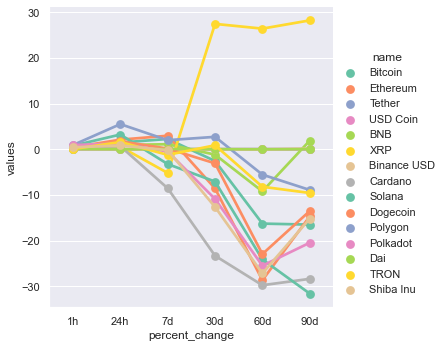

In [37]:
sns.catplot(x='percent_change', y='values', hue='name', palette='Set2', data=df6, kind='point')